In [1]:
!pip install gdown  # Ensure gdown is installed

In [2]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "1LrSPnp86QMKEpwCQKzcsR5brRoT6A-_t"
output_file = "Brain_Tumor_Object_Detection_Datasets.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1LrSPnp86QMKEpwCQKzcsR5brRoT6A-_t
To: /content/Brain_Tumor_Object_Detection_Datasets.zip
100%|██████████| 13.0M/13.0M [00:00<00:00, 28.4MB/s]


'Brain_Tumor_Object_Detection_Datasets.zip'

In [3]:
import zipfile
z = zipfile.ZipFile('/content/Brain_Tumor_Object_Detection_Datasets.zip')
z.extractall()

In [4]:
import os
import shutil

src = 'Brain_Tumor_Object_Detection_Datasets'
dst_dir = 'datasets'
dst = os.path.join(dst_dir, src)

# Create 'datasets' directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# If 'pothole_datasets' already exists in 'datasets', remove it
if os.path.exists(dst):
    shutil.rmtree(dst)

# Move 'pothole_datasets' to 'datasets'
shutil.move(src, dst)

print(f"Moved '{src}' to '{dst}' successfully.")


Moved 'Brain_Tumor_Object_Detection_Datasets' to 'datasets/Brain_Tumor_Object_Detection_Datasets' successfully.


## **Importing libraries**

In [5]:
import yaml

# Define YAML configuration
data = {
    'path': 'Brain_Tumor_Object_Detection_Datasets',
    'train': 'train/images',
    'val': 'train/images',
    'test': 'test/images',
    'nc': 1,
    'names': ['Brain Tumor']
}

# Save to pothole.yaml
with open('Brain_Tumor_Object_Detection_Datasets.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Brain_Tumor_Object_Detection_Datasets.yaml created successfully!")


Brain_Tumor_Object_Detection_Datasets.yaml created successfully!


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [7]:
from ultralytics import YOLO

# Load a pretrained YOLOv8/YOLOv9 model
model = YOLO('yolov9m.pt')

# Train the model with data augmentation
model.train(
    data='Brain_Tumor_Object_Detection_Datasets.yaml',
    epochs=50,
    imgsz=640,
    batch=8,
    name='Brain_Tumor_Object_Detection_Datasets_yolov8',
    save=True,
    save_period=-1,
    patience=20,
    val=True,

    # Data augmentation options
    degrees=10,        # Random rotation degrees
    translate=0.1,     # Random translation
    scale=0.5,         # Random scale
    shear=2.0,         # Random shear
    perspective=0.0005,# Perspective transform
    flipud=0.5,        # Vertical flip probability
    fliplr=0.5,        # Horizontal flip probability
    mosaic=1.0,        # Mosaic augmentation
    mixup=0.2,         # MixUp augmentation
    hsv_h=0.015,       # Hue augmentation
    hsv_s=0.7,         # Saturation augmentation
    hsv_v=0.4          # Value augmentation
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 39.1M/39.1M [00:00<00:00, 128MB/s]


Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Brain_Tumor_Object_Detection_Datasets.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov9m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Brain_Tumor_Object_Detection_Datasets_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, 

100%|██████████| 755k/755k [00:00<00:00, 21.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1    171648  ultralytics.nn.modules.block.RepNCSPELAN4    [64, 128, 128, 64, 1]         
  3                  -1  1    276960  ultralytics.nn.modules.block.AConv           [128, 240]                    
  4                  -1  1    629520  ultralytics.nn.modules.block.RepNCSPELAN4    [240, 240, 240, 120, 1]       


  5                  -1  1    778320  ultralytics.nn.modules.block.AConv           [240, 360]                    
  6                  -1  1   1414080  ultralytics.nn.modules.block.RepNCSPELAN4    [360, 360, 360, 180, 1]       
  7                  -1  1   1556160  ultralytics.nn.modules.block.AConv           [360, 480]                    
  8                  -1  1   2511840  ultralytics.nn.modules.block.RepNCSPELAN4    [480, 480, 480, 240, 1]       
  9                  -1  1    577440  ultralytics.nn.modules.block.SPPELAN         [480, 480, 240]               
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1   1586880  ultralytics.nn.modules.block.RepNCSPELAN4    [840, 360, 360, 180, 1]       
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None

100%|██████████| 5.35M/5.35M [00:00<00:00, 90.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 11.2±2.4 MB/s, size: 13.9 KB)


train: Scanning /content/datasets/Brain_Tumor_Object_Detection_Datasets/train/labels... 952 images, 15 backgrounds, 459 corrupt: 100%|██████████| 967/967 [00:00<00:00, 2007.62it/s]

train: /content/datasets/Brain_Tumor_Object_Detection_Datasets/train/images/00054_145.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/datasets/Brain_Tumor_Object_Detection_Datasets/train/images/00054_164.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/datasets/Brain_Tumor_Object_Detection_Datasets/train/images/00056_110.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/datasets/Brain_Tumor_Object_Detection_Datasets/train/images/00056_129.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/datasets/Brain_Tumor_Object_Detection_Datasets/train/images/00056_147.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/data

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 236.9±169.7 MB/s, size: 13.5 KB)


val: Scanning /content/datasets/Brain_Tumor_Object_Detection_Datasets/train/labels.cache... 952 images, 15 backgrounds, 459 corrupt: 100%|██████████| 967/967 [00:00<?, ?it/s]

train: /content/datasets/Brain_Tumor_Object_Detection_Datasets/train/images/00054_145.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/datasets/Brain_Tumor_Object_Detection_Datasets/train/images/00054_164.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/datasets/Brain_Tumor_Object_Detection_Datasets/train/images/00056_110.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/datasets/Brain_Tumor_Object_Detection_Datasets/train/images/00056_129.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/datasets/Brain_Tumor_Object_Detection_Datasets/train/images/00056_147.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/data

Plotting labels to runs/detect/Brain_Tumor_Object_Detection_Datasets_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 149 weight(decay=0.0), 156 weight(decay=0.0005), 155 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/Brain_Tumor_Object_Detection_Datasets_yolov8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       4.1G      1.557      2.804      1.528          5        640: 100%|██████████| 64/64 [00:25<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.39it/s]

                   all        508        517      0.647      0.426      0.448      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.59G      1.561      1.865      1.557         12        640: 100%|██████████| 64/64 [00:23<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.82it/s]


                   all        508        517   0.000174     0.0484   9.12e-05   3.74e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.67G      1.596      1.817      1.732          7        640: 100%|██████████| 64/64 [00:22<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.62it/s]


                   all        508        517     0.0594      0.178     0.0295     0.0106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.86G      1.595       1.59      1.599         11        640: 100%|██████████| 64/64 [00:23<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]

                   all        508        517      0.709      0.663      0.696      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.87G      1.551      1.419      1.543         11        640: 100%|██████████| 64/64 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.66it/s]


                   all        508        517      0.525      0.404      0.457      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.87G      1.508      1.252      1.543          8        640: 100%|██████████| 64/64 [00:22<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.67it/s]

                   all        508        517      0.746      0.797       0.83      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.87G       1.48      1.253      1.531          5        640: 100%|██████████| 64/64 [00:22<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.78it/s]

                   all        508        517      0.776      0.697      0.767      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.95G      1.445      1.181      1.473          9        640: 100%|██████████| 64/64 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.67it/s]

                   all        508        517      0.804      0.793      0.845      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.13G      1.379      1.066       1.43          4        640: 100%|██████████| 64/64 [00:22<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.81it/s]

                   all        508        517      0.785      0.811       0.86      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.13G       1.45      1.126      1.468          4        640: 100%|██████████| 64/64 [00:22<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]

                   all        508        517      0.854      0.849      0.895      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.13G      1.381      1.044      1.456          9        640: 100%|██████████| 64/64 [00:22<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.80it/s]

                   all        508        517      0.847      0.853      0.909       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.13G      1.388      1.137       1.45         10        640: 100%|██████████| 64/64 [00:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.68it/s]

                   all        508        517      0.858       0.81      0.915      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.13G      1.341      1.045      1.405          7        640: 100%|██████████| 64/64 [00:23<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]

                   all        508        517      0.805      0.708      0.787      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.13G      1.337      0.988      1.405          9        640: 100%|██████████| 64/64 [00:22<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]

                   all        508        517      0.864      0.876      0.934      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.13G      1.306      0.965      1.392          8        640: 100%|██████████| 64/64 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.67it/s]


                   all        508        517      0.821      0.832      0.896       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.13G      1.335     0.9906      1.412          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.68it/s]

                   all        508        517      0.864      0.845      0.915      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.13G      1.343     0.9332      1.422          6        640: 100%|██████████| 64/64 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]

                   all        508        517       0.87      0.853      0.917      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.13G      1.319     0.9601       1.43          9        640: 100%|██████████| 64/64 [00:22<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.72it/s]

                   all        508        517      0.872      0.885      0.934      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.13G      1.327      0.943      1.423          6        640: 100%|██████████| 64/64 [00:23<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]

                   all        508        517      0.885      0.849      0.934      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.13G      1.299     0.9324      1.405          7        640: 100%|██████████| 64/64 [00:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.75it/s]

                   all        508        517      0.884      0.894       0.94      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.13G       1.27      0.889      1.372         11        640: 100%|██████████| 64/64 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.71it/s]

                   all        508        517      0.903      0.878      0.943       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.13G      1.271     0.8702      1.372          7        640: 100%|██████████| 64/64 [00:22<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.82it/s]

                   all        508        517      0.884      0.822      0.909      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.13G      1.259     0.8533      1.348         10        640: 100%|██████████| 64/64 [00:22<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.73it/s]

                   all        508        517      0.903      0.862      0.937       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.13G      1.287     0.8926      1.401          8        640: 100%|██████████| 64/64 [00:22<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.81it/s]

                   all        508        517      0.884      0.872      0.934      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.13G      1.272     0.8742      1.376          9        640: 100%|██████████| 64/64 [00:23<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.68it/s]

                   all        508        517      0.896      0.905      0.947      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.13G      1.278     0.8518      1.357          8        640: 100%|██████████| 64/64 [00:22<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.81it/s]

                   all        508        517       0.88      0.883      0.935      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.13G      1.227     0.8062      1.323         12        640: 100%|██████████| 64/64 [00:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]

                   all        508        517      0.892      0.931      0.943      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.13G      1.246     0.7874      1.351          8        640: 100%|██████████| 64/64 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.75it/s]

                   all        508        517      0.903       0.92      0.954      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.13G      1.202     0.8216      1.328          6        640: 100%|██████████| 64/64 [00:22<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.71it/s]

                   all        508        517      0.892      0.925      0.954      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.13G      1.232     0.7981      1.346          6        640: 100%|██████████| 64/64 [00:22<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]

                   all        508        517      0.884      0.931      0.955       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.13G      1.233     0.7971       1.31          4        640: 100%|██████████| 64/64 [00:22<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.72it/s]

                   all        508        517      0.888      0.923      0.958      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.13G      1.223     0.8255      1.333          7        640: 100%|██████████| 64/64 [00:23<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.71it/s]

                   all        508        517      0.865      0.904      0.944      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.13G      1.244     0.7666      1.327          6        640: 100%|██████████| 64/64 [00:22<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.73it/s]

                   all        508        517      0.922      0.917      0.961      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.13G       1.18     0.7509      1.305          6        640: 100%|██████████| 64/64 [00:22<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.71it/s]

                   all        508        517      0.889      0.927      0.955      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.13G      1.211     0.7755      1.332          5        640: 100%|██████████| 64/64 [00:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.77it/s]

                   all        508        517      0.904      0.946      0.966      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.13G      1.213     0.7498      1.333         10        640: 100%|██████████| 64/64 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.69it/s]

                   all        508        517      0.905       0.95      0.963      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.13G      1.142     0.7204      1.282          8        640: 100%|██████████| 64/64 [00:22<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.83it/s]

                   all        508        517      0.907      0.897      0.953      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.13G      1.185     0.7457      1.306          7        640: 100%|██████████| 64/64 [00:22<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.52it/s]

                   all        508        517      0.913      0.955      0.971      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.13G      1.232      0.742      1.336         10        640: 100%|██████████| 64/64 [00:22<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.79it/s]

                   all        508        517      0.932      0.959      0.967      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.13G      1.156     0.7327      1.284          6        640: 100%|██████████| 64/64 [00:22<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.71it/s]

                   all        508        517      0.917      0.952      0.969      0.651


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.13G      1.045     0.6153       1.23          4        640: 100%|██████████| 64/64 [00:23<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.81it/s]

                   all        508        517      0.923      0.961      0.975      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.13G     0.9992     0.5921      1.234          4        640: 100%|██████████| 64/64 [00:22<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.72it/s]

                   all        508        517      0.917      0.959      0.969      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.13G      1.001     0.5851      1.216          4        640: 100%|██████████| 64/64 [00:22<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.83it/s]

                   all        508        517      0.915      0.962      0.967      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.13G      1.001     0.5746      1.233          4        640: 100%|██████████| 64/64 [00:22<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.71it/s]

                   all        508        517      0.929      0.971      0.971      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.13G     0.9925     0.5574      1.231          4        640: 100%|██████████| 64/64 [00:22<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.75it/s]


                   all        508        517      0.931      0.963      0.972      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.13G     0.9915      0.539      1.227          5        640: 100%|██████████| 64/64 [00:22<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.71it/s]

                   all        508        517      0.926      0.969      0.976      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.13G      1.006     0.5518      1.235          4        640: 100%|██████████| 64/64 [00:22<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.71it/s]

                   all        508        517      0.928      0.977      0.972      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.13G     0.9861     0.5147        1.2          5        640: 100%|██████████| 64/64 [00:22<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.71it/s]

                   all        508        517      0.935      0.977      0.976      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.13G     0.9759     0.5077      1.197          4        640: 100%|██████████| 64/64 [00:22<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.72it/s]

                   all        508        517      0.947       0.97      0.978      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.13G      0.969     0.5072      1.192          4        640: 100%|██████████| 64/64 [00:22<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.74it/s]

                   all        508        517      0.942      0.979      0.979      0.662



50 epochs completed in 0.449 hours.
Optimizer stripped from runs/detect/Brain_Tumor_Object_Detection_Datasets_yolov8/weights/last.pt, 40.8MB
Optimizer stripped from runs/detect/Brain_Tumor_Object_Detection_Datasets_yolov8/weights/best.pt, 40.8MB

Validating runs/detect/Brain_Tumor_Object_Detection_Datasets_yolov8/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9m summary (fused): 151 layers, 20,013,715 parameters, 0 gradients, 76.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.44it/s]


                   all        508        517       0.93       0.97      0.971      0.688
Speed: 0.3ms preprocess, 12.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/Brain_Tumor_Object_Detection_Datasets_yolov8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ef6185ab990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [8]:
import random
import cv2

def draw_boxes(image, box, label, color_sample):

    image_with_boxes = image.copy()

    xmin, ymin, xmax, ymax = map(int, box)

    # Ensure correct indexing
    color = random.choice(color_sample)

    # Draw bounding box
    cv2.rectangle(image_with_boxes, (xmin, ymin), (xmax, ymax), color, 2)

    # Draw label text
    text = label
    text_size, _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1, 3)
    text_w, text_h = text_size

    # Adjust text position to prevent out-of-bounds
    ymin_text = max(ymin - text_h - 5, 0)

    # Background rectangle for text
    cv2.rectangle(image_with_boxes, (xmin, ymin_text-5), (xmin + text_w + 10, ymin), color, -1)

    # Put text on the image with white color for better visibility
    cv2.putText(
        image_with_boxes,
        text,
        (xmin + 5, ymin - 5),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 0, 0),  # White text
        2,
        cv2.LINE_AA,
    )

    return image_with_boxes


image 1/1 /content/datasets/Brain_Tumor_Object_Detection_Datasets/test/images/00032_96.jpg: 640x640 1 Brain Tumor, 40.3ms
Speed: 3.5ms preprocess, 40.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/Brain_Tumor_Object_Detection_Datasets/test/images/00045_117.jpg: 640x640 1 Brain Tumor, 39.4ms
Speed: 2.7ms preprocess, 39.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/Brain_Tumor_Object_Detection_Datasets/test/images/60 (10).jpg: 640x640 1 Brain Tumor, 39.3ms
Speed: 2.7ms preprocess, 39.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/Brain_Tumor_Object_Detection_Datasets/test/images/60 (10).jpg: 640x640 1 Brain Tumor, 39.3ms
Speed: 2.5ms preprocess, 39.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/Brain_Tumor_Object_Detection_Datasets/test/images/57.jpg: 640x640 1 Brain Tumor, 39.3ms
Spee

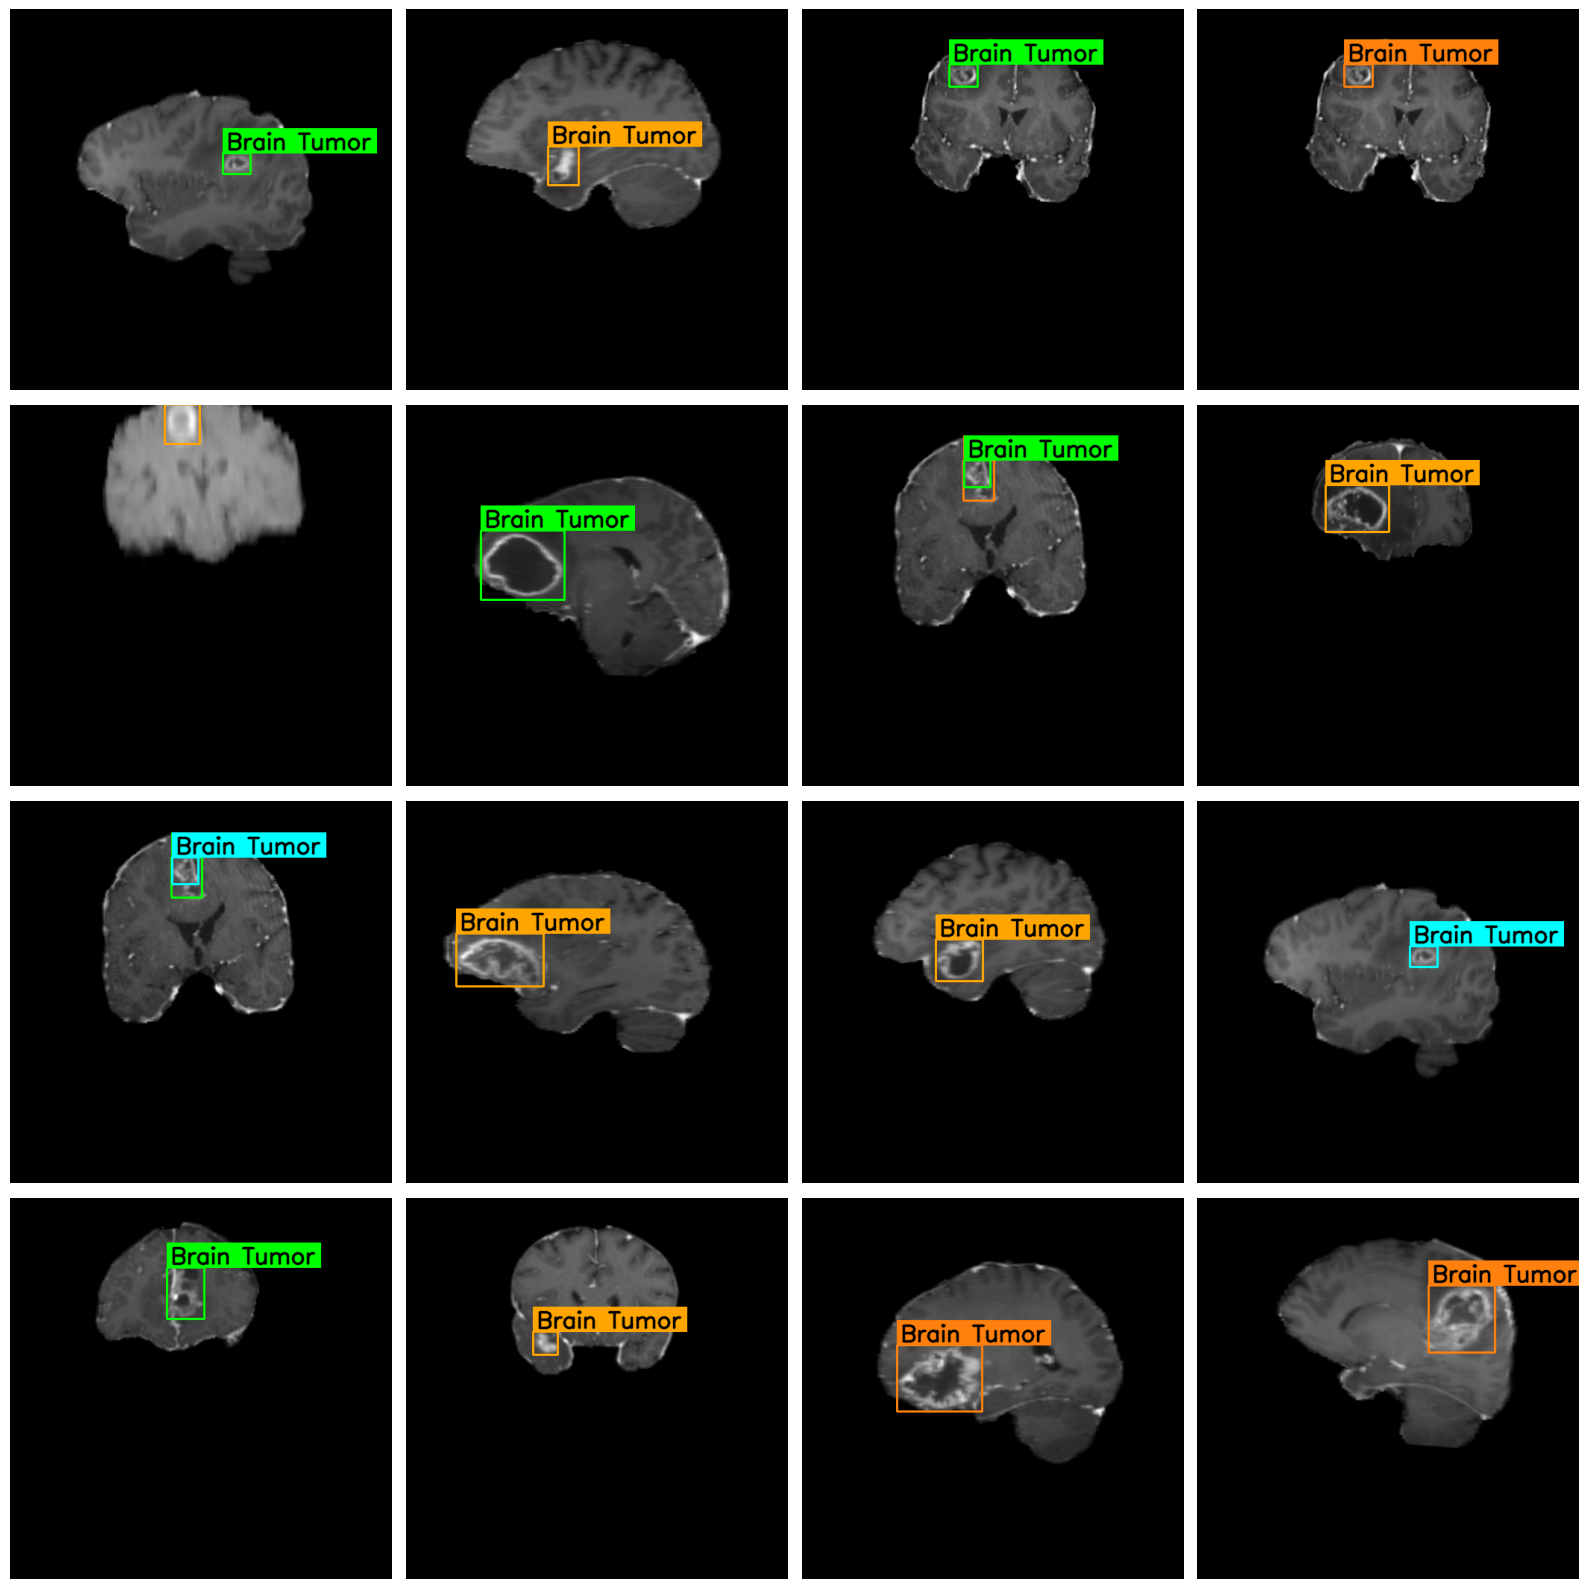

In [10]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained model
model = YOLO('runs/detect/Brain_Tumor_Object_Detection_Datasets_yolov8/weights/best.pt')

# Test images directory
test_images_dir = 'datasets/Brain_Tumor_Object_Detection_Datasets/test/images'

color_sample = [
    (12, 128, 255),   # Orange-ish
    (255, 0, 127),    # Pink
    (0, 255, 0),      # Green
    (255, 255, 0),    # Cyan
    (0, 165, 255)     # Blue-ish
]

# Get list of test images (max 16)
image_files = os.listdir(test_images_dir)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_name = random.choice(image_files)
    img_path = os.path.join(test_images_dir, img_name)
    image = cv2.imread(img_path)

    # Inference
    results = model(img_path)[0]  # Get first result (one image)

    # Draw each box if confidence > 0.8
    for box in results.boxes:

        xyxy = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        label = model.names[cls_id]
        image = draw_boxes(image, xyxy, label, color_sample)

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot
    ax[idx].imshow(image_rgb)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()
